In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

In [3]:
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [126]:
# Twitter account
user_name = "username"
password = "password"
# Query
keyword = "(@Starbucks OR @dunkindonuts OR @cariboucoffee OR @GloriaJeansUSA OR @CaffeNero_US OR @CostaCoffee OR @TheCoffeeBean OR @bluebottleroast OR @peetscoffee OR @TimHortons OR @McCafe)" 
# target duration
since = '11/1/2019'
until = '11/30/2019'
s_date = pd.date_range(start=since, end=until)

In [127]:
# call chrome driver
driver = webdriver.Chrome()
# open the bidding website
driver.get("https://www.twitter.com/")

# wait until Log in is clickable
wait = WebDriverWait(driver, 10)
wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "Log in")))

# login
driver.find_element_by_link_text("Log in").click()

# wait until Log in is clickable
wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/form/div/div[3]/div')))

# log in twitter
driver.find_element_by_name("session[username_or_email]").send_keys(user_name)
driver.find_element_by_name("session[password]").send_keys(password)
driver.find_element_by_xpath('//*[@id="react-root"]/div/div/div[2]/main/div/div/form/div/div[3]/div').click()

In [128]:
# start crawling
for date in range(len(s_date)-1):
    query = keyword+" since:"+str(s_date[date].date())+" until:"+str(s_date[date+1].date())
    print("start: ", str(s_date[date].date()))

    # wait until search form is available
    wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div[1]/div[2]/div/div/div/form/div[1]/div/div/div[2]/input')))
#     wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div[2]/input')))

    # search starbucks
    search_form = driver.find_element_by_xpath('//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div[1]/div[2]/div/div/div/form/div[1]/div/div/div[2]/input')
    search_form.send_keys(query)
    search_form.submit()

    # wait until search form is available
    wait.until(EC.element_to_be_clickable((By.TAG_NAME, "article")))

    scroll_from = 0
    # get page height
    height = driver.execute_script("return document.body.scrollHeight")
    scroll_to = height

    tweets = []
    for i in range(10):
        # wait until loading articles
        time.sleep(10)
        # get articles
        articles = driver.find_elements_by_tag_name("article")
        for j in articles:
            tweet = []
            spans = j.find_elements_by_tag_name("span")
            for k in spans:
                tweet.extend([k.get_attribute('innerHTML')])
            tweets.append(tweet)
        # scroll to the end
        driver.execute_script("window.scrollTo("+str(scroll_from)+", "+str(scroll_to)+");")
        scroll_from = scroll_to
        scroll_to += height

    # Save raw data
    df = pd.DataFrame(tweets)
    df.to_csv("./data/Twitter_crawling_data/" + str(s_date[date].date()) + ".csv")
    
    # Wait until back button is available
    wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div[1]/div')))
    driver.find_element_by_xpath('//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div[1]/div').click()
    
    # Extract only tweet content
    pre_processed = []
    for i in range(len(df)):
        content = ' '.join(df.loc[i].dropna().to_list())
        content = re.sub('<a.*?>|</a>|<div.*?>|</div>|<img.*?>', '', content)
        pattern = '.*?·(.*?)<span.*'
        repatter = re.compile(pattern)
        result = repatter.match(content)
        if result:
            pre_processed.append([i, result.group(1)])
            
    pd.DataFrame(pre_processed).set_index(0).to_csv("./data/Twitter_crawling_data/" + str(s_date[date].date()) + "_pre_processed.csv")
    print("saved: ", str(s_date[date].date()))
    
driver.quit()

start:  2019-11-01
saved:  2019-11-01
start:  2019-11-02
saved:  2019-11-02
start:  2019-11-03
saved:  2019-11-03
start:  2019-11-04
saved:  2019-11-04
start:  2019-11-05
saved:  2019-11-05
start:  2019-11-06
saved:  2019-11-06
start:  2019-11-07
saved:  2019-11-07
start:  2019-11-08
saved:  2019-11-08
start:  2019-11-09
saved:  2019-11-09
start:  2019-11-10
saved:  2019-11-10
start:  2019-11-11
saved:  2019-11-11
start:  2019-11-12
saved:  2019-11-12
start:  2019-11-13
saved:  2019-11-13
start:  2019-11-14
saved:  2019-11-14
start:  2019-11-15
saved:  2019-11-15
start:  2019-11-16
saved:  2019-11-16
start:  2019-11-17
saved:  2019-11-17
start:  2019-11-18
saved:  2019-11-18
start:  2019-11-19
saved:  2019-11-19
start:  2019-11-20
saved:  2019-11-20
start:  2019-11-21
saved:  2019-11-21
start:  2019-11-22
saved:  2019-11-22
start:  2019-11-23
saved:  2019-11-23
start:  2019-11-24
saved:  2019-11-24
start:  2019-11-25
saved:  2019-11-25
start:  2019-11-26
saved:  2019-11-26
start:  2019

In [134]:
# target duration
since = '10/1/2019'
until = '11/30/2019'
s_date = pd.date_range(start=since, end=until)

df = pd.DataFrame()
for date in range(len(s_date)-1):
    tmp = pd.read_csv("./data/Twitter_crawling_data/" + str(s_date[date].date()) + "_pre_processed.csv")
    df = pd.concat([df, tmp])

# Discard meaningless and duplicated tweets
length = lambda x: len(x)
file_name = "./data/Twitter_crawling_data/since:2019-10-1_until:2019-11-30_pre_processed_over30.csv"
df[df['1'].map(length) > 30].drop_duplicates(subset='1').to_csv(file_name)

In [172]:
# Add column to represent which coffee chain a user tweets 
coffee_chain_brand_list = ["@Starbucks", "@dunkindonuts", "@cariboucoffee", "@GloriaJeansUSA", "@CaffeNero_US", "@CostaCoffee", "@TheCoffeeBean", "@bluebottleroast", "@peetscoffee", "@TimHortons", "@McCafe"]
df = pd.read_csv(file_name)
df_t = pd.DataFrame(index=df.index, columns=coffee_chain_brand_list).fillna(0)
for i in range(len(df)):
    for j in set(df['1'].loc[i].split(" ")).intersection(set(coffee_chain_brand_list)):
        df_t[j].iloc[i] = 1

df_res = pd.concat([df, df_t], axis=1)

In [236]:
df_res.to_csv("./data/Twitter_crawling_data/complete_dataset_2019-10-1_2019-11-30.csv")

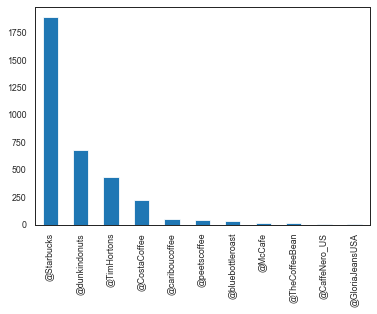

In [195]:
# Plot share of mouth
df_res[coffee_chain_brand_list].sum().sort_values(ascending=False).plot(kind='bar')